In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [10]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

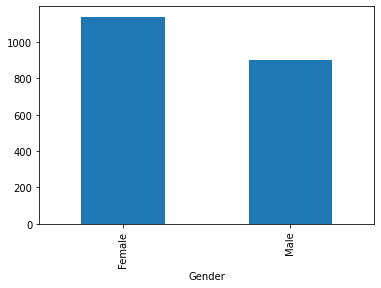

In [34]:
df.groupby('Gender')['Exited'].sum().plot(kind='bar')

In [31]:
df.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100601.541382
Male       99664.576931
Name: EstimatedSalary, dtype: float64

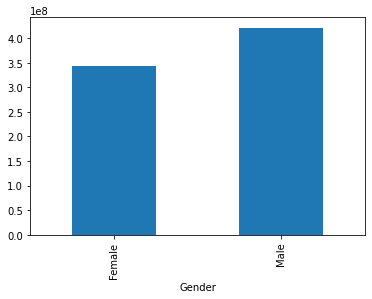

In [37]:
df.groupby('Gender')['Balance'].sum().plot(kind='bar')

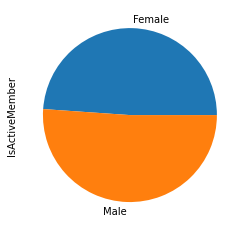

In [41]:
df.groupby('Gender')['IsActiveMember'].mean().plot(kind='pie')

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [49]:
df.Gender.replace({'Female':0, 'Male':1}, inplace = True)

In [51]:
df2 = pd.get_dummies(data=df, columns=['Geography'])

In [52]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [54]:
X = df2.drop('Exited', axis =1)
y = df2.Exited

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [57]:
X_train.shape

(8000, 12)

In [61]:
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape = (12,), activation='relu'),
                          keras.layers.Dense(500, activation='relu'),
                          keras.layers.Dense(1000, activation='relu'),
                          keras.layers.Dense(5000, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),

])

In [62]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [64]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 16s 62ms/step - loss: 0.3446 - accuracy: 0.8631
Epoch 2/100
250/250 [==============================] - 15s 61ms/step - loss: 0.3374 - accuracy: 0.8644
Epoch 3/100
250/250 [==============================] - 15s 61ms/step - loss: 0.3329 - accuracy: 0.8656
Epoch 4/100
250/250 [==============================] - 15s 61ms/step - loss: 0.3279 - accuracy: 0.8644
Epoch 5/100
250/250 [==============================] - 15s 61ms/step - loss: 0.3306 - accuracy: 0.8634
Epoch 6/100
250/250 [==============================] - 15s 61ms/step - loss: 0.3250 - accuracy: 0.8652
Epoch 7/100
250/250 [==============================] - 15s 62ms/step - loss: 0.3216 - accuracy: 0.8673
Epoch 8/100
250/250 [==============================] - 15s 62ms/step - loss: 0.3225 - accuracy: 0.8681
Epoch 9/100
250/250 [==============================] - 15s 61ms/step - loss: 0.3170 - accuracy: 0.8691
Epoch 10/100
250/250 [==============================] - 15s 61ms/step - l

In [65]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 13ms/step - loss: 1.5101 - accuracy: 0.8110


[1.5101099014282227, 0.8109999895095825]

In [66]:
preds = model.predict(X_test)

In [73]:
for i in range(len(preds)):
  if preds[i] > 0.5:
    preds[i] = 1
  else:
    preds[i] = 0

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [75]:
cm = confusion_matrix(y_test, preds)

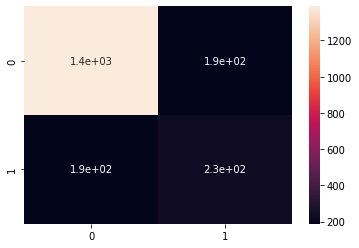

In [76]:
sns.heatmap(cm, annot = True)